In [1]:
import pandas as pd
import numpy as np
import random as rd

from sklearn.decomposition import PCA
from sklearn import preprocessing

import matplotlib.pyplot as plt

In [2]:
genes = ['gene' + str(i) for i in range(1, 101)]

wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range (1,6)]

data = pd.DataFrame(columns = [*wt, *ko], index =genes) #распаковка, * делает один массив из 10 эелементов а не 2 по 5 
# пустой датафрейм с генами 

In [3]:
genes

['gene1',
 'gene2',
 'gene3',
 'gene4',
 'gene5',
 'gene6',
 'gene7',
 'gene8',
 'gene9',
 'gene10',
 'gene11',
 'gene12',
 'gene13',
 'gene14',
 'gene15',
 'gene16',
 'gene17',
 'gene18',
 'gene19',
 'gene20',
 'gene21',
 'gene22',
 'gene23',
 'gene24',
 'gene25',
 'gene26',
 'gene27',
 'gene28',
 'gene29',
 'gene30',
 'gene31',
 'gene32',
 'gene33',
 'gene34',
 'gene35',
 'gene36',
 'gene37',
 'gene38',
 'gene39',
 'gene40',
 'gene41',
 'gene42',
 'gene43',
 'gene44',
 'gene45',
 'gene46',
 'gene47',
 'gene48',
 'gene49',
 'gene50',
 'gene51',
 'gene52',
 'gene53',
 'gene54',
 'gene55',
 'gene56',
 'gene57',
 'gene58',
 'gene59',
 'gene60',
 'gene61',
 'gene62',
 'gene63',
 'gene64',
 'gene65',
 'gene66',
 'gene67',
 'gene68',
 'gene69',
 'gene70',
 'gene71',
 'gene72',
 'gene73',
 'gene74',
 'gene75',
 'gene76',
 'gene77',
 'gene78',
 'gene79',
 'gene80',
 'gene81',
 'gene82',
 'gene83',
 'gene84',
 'gene85',
 'gene86',
 'gene87',
 'gene88',
 'gene89',
 'gene90',
 'gene91',
 'gene92

In [4]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
gene96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for gene in data.index: #заполняем датафрейм
    data.loc[gene, 'wt1':'wt5']=np.random.poisson(lam=rd.randrange(10, 1000), size =5)  #локирует по датафрейму в конкретному месту, в датасете локирует место по индексу(названию) строки
    data.loc[gene, 'ko1':'ko5']=np.random.poisson(lam=rd.randrange(10, 1000), size =5)

In [ ]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,503,508,506,534,495,434,402,428,466,452
gene2,391,408,418,426,436,828,794,790,791,799
gene3,702,648,734,638,708,786,803,812,817,822
gene4,879,867,826,824,845,255,296,294,275,273
gene5,147,159,155,149,144,957,930,964,1013,905


In [7]:
scaled_data = preprocessing.scale(data.T)

In [9]:
scaled_data

array([[ 1.07876547, -1.01236293, -1.00137132, -0.99505575, -0.71042989,
         1.22961426,  2.15831457, -0.80571072,  1.05660618, -1.01287142,
        -0.1378953 ,  0.99728525, -1.0053494 , -1.02152309,  0.88819562,
         1.25718926,  1.00465117,  0.84125032,  1.09329365,  0.85577426,
        -0.96408292,  1.5279344 ,  0.93924038,  1.07307801,  0.95144641,
        -0.90351857, -0.92534127, -0.75059538,  0.9537596 ,  1.11586346,
        -1.04302986, -0.92520884, -1.04043959, -0.70988894, -1.02956884,
        -1.12891798,  1.02689704,  0.83206345,  1.00568273,  1.00498569,
         1.20097416, -1.0694624 ,  1.02077832, -0.93373613,  1.02188989,
         0.27351959, -0.86276035, -1.36815745,  0.43081043,  0.90521733,
        -1.19549653, -1.00767038, -0.94953665, -1.03053082, -1.65664236,
        -0.86889815,  1.97246059,  0.22687437, -1.55961044,  1.48168202,
        -0.90193494, -0.8084833 , -0.8248998 , -0.98514902,  0.90078659,
        -0.96423505, -0.84432673,  1.44081883, -1.2

In [10]:
pca = PCA() #не указано количетсво пса, авт выбран минимум между мин фичей и мин компонентов

In [11]:
pca.fit(scaled_data) # фит поворот и сдвиг 

PCA()

In [12]:
pca_data = pca.transform(scaled_data) # трнасформ понизил размерность, получ уже спроец данные

In [13]:
scaled_data.shape #было размерность

(10, 100)

In [14]:
pca_data.shape #стало

(10, 10)

In [15]:
per_var = np.round(pca.explained_variance_ratio_ *100, decimals=1) #EVR показывает колько на себя каждая компонента берет разброса
labels = ['PC' + str(x) for x in range (1,  len(per_var)+1)]
#сумм дисперсия всех компонент = сумм дисперсия исх данных

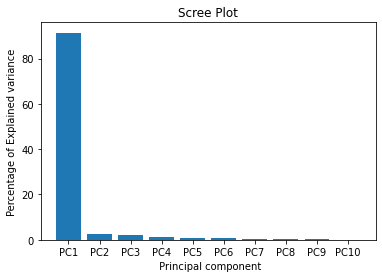

In [16]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label = labels) #график
plt.ylabel('Percentage of Explained variance')
plt.xlabel(' Principal component')
plt.title('Scree Plot')
plt.show() #по графику видно что 1 компонента самая информативная тк у нее больше всего разброса